---
<div align="center">

<img align="center" src="https://www.di.uoa.gr/themes/corporate_lite/logo_en.png" width="500"/>

<hr>


</div>

<div align="center">
<h1><strong>YS19 - Artificial Intelligence II <br>Deep Learning for NLP</strong></h1>
</div>

<hr>

<div align="center">
<h2>Homework #3 - RNNs/LSTMs/GRUs (2)</h2>
</div>




---


# MNIST classification example using RNNs

----

In this example we will utilize the functionalitis of pytorch for data loading and rnn models.

The task will be image classification on MNIST dataset utilizing sequence models.


Modified example from [here](https://www.dezyre.com/recipes/run-basic-rnn-model-using-pytorch)

## Package import

In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import numpy as np

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
import seaborn as sns
import random
import sys



def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run. This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

device = 'cpu'
print('Working on:', device)

Working on: cpu


## Downloading the MNIST dataset and creating pyTorch DataLoader

In [2]:
# How many images at once
BATCH_SIZE = 64

# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,
    # Converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (Channel x Height x Width) and normalize in the range [0.0, 1.0]
    transform=transforms.ToTensor(),    
    # Set to True for the first time to download it                        
    download=True,
)

# Data Loader for batching
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=BATCH_SIZE, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([60000])


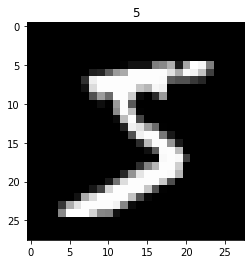

In [3]:
# plot one example
print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

## Creating test set

In [4]:
# Get a subset of the test set for fast evaluation
TEST_SIZE = 1000
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size=TEST_SIZE, shuffle=True)
# Remove the channel dimension
for step, (test_x, test_y) in enumerate(test_loader):
    test_x = test_x.view(-1,28,28)
    pass
print(test_x.shape, test_y.shape)

torch.Size([1000, 28, 28]) torch.Size([1000])


## Initializing consine RNN class from pyTorch

In [5]:
class RNN(nn.Module):
    """
      Wrapper module for RNN, LSTM, GRU cells using pytorch api. The output is fed to a FFN for classification.
    """
    def __init__(self, cell_type, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        cells = {
        "RNN" : nn.RNN,
        "LSTM"    : nn.LSTM,
        "GRU"     : nn.GRU
    }
        self.cell_type = cell_type
        self.rnn = cells[cell_type](         # Pick the specific model
            input_size=input_size,           # Number of features for each time step
            hidden_size=hidden_size,         # rnn hidden units
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(hidden_size, output_size) # Feed forward network

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        
        if self.cell_type == 'LSTM':
            r_out, (h_n, h_c) = self.rnn(x) 
        else:
            r_out, h_n = self.rnn(x)

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

## Configuring the RNN

In [6]:
input_size = 28
hidden_size = 64
output_size = 10
cell_type = 'LSTM'
net = RNN(cell_type, input_size, hidden_size, output_size)
print(net)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


### Questions ❓

- What are the output dimensions?
- What are other strategies for getting the representation of the whole image as input to the last-layer FFN?

In [7]:
EPOCH = 1
LR = 0.01

optimizer = torch.optim.Adam(net.parameters(), lr=LR)   # optimize all net parameters
loss_func = nn.CrossEntropyLoss()

## Train and test the model

Epoch:  0 | train loss: 2.2976 | test accuracy: 0.10
Epoch:  0 | train loss: 0.9061 | test accuracy: 0.58
Epoch:  0 | train loss: 0.7806 | test accuracy: 0.77
Epoch:  0 | train loss: 0.5939 | test accuracy: 0.83
Epoch:  0 | train loss: 0.3056 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4103 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2851 | test accuracy: 0.93
Epoch:  0 | train loss: 0.3337 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2880 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0832 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2906 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1232 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0218 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1070 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0494 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2646 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1448 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1875 | test accuracy: 0.95
Epoch:  0 | train loss: 0.3009 | test accuracy

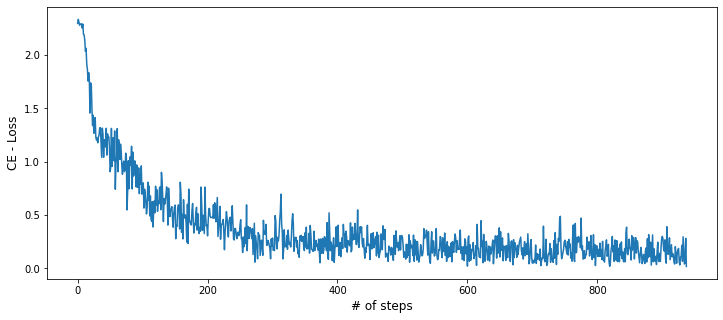

In [8]:
# Start train mode
net.train()

# Accumulate losses
losses = []

# Count the number of batches given to the model
step_count = 0

# Evaluate the progress every # batches
print_every = 50

# Iterate over the whole dataset for one epoch
for epoch in range(EPOCH):

    # Generate batch data
    for step, (x, y) in enumerate(train_loader):

        # clear gradients for this training step
        optimizer.zero_grad() 
        
        # reshape x to (batch, time_step, input_size)
        b_x = x.view(-1, 28, 28)

        # batch y
        b_y = y                               
        
        
        output = net(b_x)                               
        loss = loss_func(output, b_y) 
        
        # For visualization
        losses.append(loss.item())
        step_count += 1
        
        
        # backpropagation - compute gradients                             
        loss.backward() 

        # apply gradients
        optimizer.step()                               
    
        # evaluate every N batches
        if step % print_every == 0:

            # Do not calculate gradients
            with torch.no_grad():

                # Faster inference
                net.eval()
                
                test_output = net(test_x)

                # Get predicted class
                pred_y = torch.argmax(test_output, dim=1).squeeze()

                # Calculate accuracy
                accuracy = (pred_y == test_y).sum().item() / float(TEST_SIZE)
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy)

            # Return to training mode
            net.train()

# Plot results
plt.figure(figsize=(12,5))
plt.plot(losses)
plt.xlabel('# of steps', fontsize=12)
plt.ylabel('CE - Loss', fontsize=12)
plt.show()

### Hint 🤔

- Try playin around with models/lr/epochs/hidden_size (e.g. RNN, 0.001) and guess the behavior

## Inference on a set of samples

In [9]:
N = 10
print(f'Make: {N} predictions')
test_output = net(test_x[:N,:,:].view(-1,28,28))
y_pred = torch.argmax(test_output, dim=1).data.numpy().squeeze()
y_true = test_y[:N].data.numpy().squeeze()
print(y_true, 'real number')
print(y_pred, 'prediction number')

Make: 10 predictions
[0 1 7 9 8 2 3 1 0 9] real number
[0 1 7 9 8 2 3 1 0 9] prediction number


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(f'Classification Report:')
print(f'{classification_report(y_true, y_pred)}')
print(f'Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]


## Other details

- Bidirectional + Multilayer. Check out layer sizes from the docs e.g. [LSTM module](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)
- Skipping connections
- Trainable/Frozen embeddings as input
- Hyperparameter tuning in pytorch


## **BONUS: Optuna**  💣

An open source hyperparameter optimization framework to automate hyperparameter search

In [ ]:
%pip install optuna

In [14]:
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):

  input_size = 28
  hidden_size =  trial.suggest_categorical('hidden_size', [64, 128])
  output_size = 10
  cell_type = trial.suggest_categorical('cell_type', ['LSTM', 'GRU'])
  net = RNN(cell_type, input_size, hidden_size, output_size)
  print(net)

  EPOCH = 1
  LR = 0.01
  optimizer = torch.optim.Adam(net.parameters(), lr=LR)   # optimize all net parameters
  loss_func = nn.CrossEntropyLoss()

  # # 2. Suggest values of the hyperparameters using a trial object.
  # n_layers = trial.suggest_int('n_layers', 1, 3)
  # layers = []

  # Start train mode
  net.train()

  # Accumulate losses
  losses = []

  # Count the number of batches given to the model
  step_count = 0

  # Evaluate the progress every # batches
  print_every = 50

  # Iterate over the whole dataset for one epoch
  for epoch in range(EPOCH):

      # Generate batch data
      for step, (x, y) in enumerate(train_loader):

          # clear gradients for this training step
          optimizer.zero_grad() 
          
          # reshape x to (batch, time_step, input_size)
          b_x = x.view(-1, 28, 28)

          # batch y
          b_y = y                               
          
          
          output = net(b_x)                               
          loss = loss_func(output, b_y) 
          
          # For visualization
          losses.append(loss.item())
          step_count += 1
          
          
          # backpropagation - compute gradients                             
          loss.backward() 

          # apply gradients
          optimizer.step()                               
      
          # evaluate every N batches
          if step % print_every == 0:

              # Do not calculate gradients
              with torch.no_grad():

                  # Faster inference
                  net.eval()
                  
                  test_output = net(test_x)

                  # Get predicted class
                  pred_y = torch.argmax(test_output, dim=1).squeeze()

                  # Calculate accuracy
                  accuracy = (pred_y == test_y).sum().item() / float(TEST_SIZE)
                  print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy)

              # Return to training mode
              net.train()

  return accuracy

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

[I 2022-12-14 13:04:11,952] A new study created in memory with name: no-name-bb8b07c7-6100-42c2-9d55-6e7051d8a880


RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3126 | test accuracy: 0.10
Epoch:  0 | train loss: 1.3643 | test accuracy: 0.56
Epoch:  0 | train loss: 0.9075 | test accuracy: 0.71
Epoch:  0 | train loss: 0.7976 | test accuracy: 0.79
Epoch:  0 | train loss: 0.3181 | test accuracy: 0.86
Epoch:  0 | train loss: 0.2853 | test accuracy: 0.90
Epoch:  0 | train loss: 0.3572 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1955 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1736 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2738 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1627 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0987 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1147 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1922 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0425 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1703 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0511 | test accurac

[I 2022-12-14 13:04:37,520] Trial 0 finished with value: 0.958 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM'}. Best is trial 0 with value: 0.958.


RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3004 | test accuracy: 0.10
Epoch:  0 | train loss: 1.0231 | test accuracy: 0.60
Epoch:  0 | train loss: 0.9308 | test accuracy: 0.77
Epoch:  0 | train loss: 0.4536 | test accuracy: 0.82
Epoch:  0 | train loss: 0.3300 | test accuracy: 0.90
Epoch:  0 | train loss: 0.5166 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2875 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1110 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2197 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1351 | test accuracy: 0.95
Epoch:  0 | train loss: 0.3174 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2043 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2693 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2788 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2304 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2064 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1501 | test accurac

[I 2022-12-14 13:05:01,491] Trial 1 finished with value: 0.972 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM'}. Best is trial 1 with value: 0.972.


RNN(
  (rnn): GRU(28, 128, batch_first=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3014 | test accuracy: 0.10
Epoch:  0 | train loss: 0.7659 | test accuracy: 0.70
Epoch:  0 | train loss: 0.4617 | test accuracy: 0.84
Epoch:  0 | train loss: 0.3493 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1797 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3414 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0698 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1830 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2112 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2350 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2335 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1435 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2510 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0902 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1209 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0970 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2753 | test accura

[I 2022-12-14 13:05:34,681] Trial 2 finished with value: 0.967 and parameters: {'hidden_size': 128, 'cell_type': 'GRU'}. Best is trial 1 with value: 0.972.


RNN(
  (rnn): GRU(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2936 | test accuracy: 0.09
Epoch:  0 | train loss: 1.5797 | test accuracy: 0.57
Epoch:  0 | train loss: 0.4280 | test accuracy: 0.75
Epoch:  0 | train loss: 0.4430 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2597 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1974 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1031 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2160 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1495 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1222 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0427 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1467 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0920 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0765 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1080 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1489 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0687 | test accuracy

[I 2022-12-14 13:05:55,552] Trial 3 finished with value: 0.968 and parameters: {'hidden_size': 64, 'cell_type': 'GRU'}. Best is trial 1 with value: 0.972.


RNN(
  (rnn): GRU(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3133 | test accuracy: 0.09
Epoch:  0 | train loss: 1.0749 | test accuracy: 0.63
Epoch:  0 | train loss: 0.8937 | test accuracy: 0.81
Epoch:  0 | train loss: 0.4735 | test accuracy: 0.85
Epoch:  0 | train loss: 0.5430 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3068 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2847 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2238 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1295 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0984 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0155 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0521 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2229 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1540 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1429 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0685 | test accuracy: 0.96
Epoch:  0 | train loss: 0.3072 | test accuracy

[I 2022-12-14 13:06:18,956] Trial 4 finished with value: 0.972 and parameters: {'hidden_size': 64, 'cell_type': 'GRU'}. Best is trial 1 with value: 0.972.


RNN(
  (rnn): GRU(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2903 | test accuracy: 0.11
Epoch:  0 | train loss: 1.0358 | test accuracy: 0.63
Epoch:  0 | train loss: 0.6318 | test accuracy: 0.83
Epoch:  0 | train loss: 0.4461 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1551 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2884 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1589 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0788 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1664 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1106 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0897 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2734 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1388 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0525 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0911 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2137 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1316 | test accuracy

[I 2022-12-14 13:06:44,003] Trial 5 finished with value: 0.964 and parameters: {'hidden_size': 64, 'cell_type': 'GRU'}. Best is trial 1 with value: 0.972.


RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3090 | test accuracy: 0.08
Epoch:  0 | train loss: 1.0574 | test accuracy: 0.58
Epoch:  0 | train loss: 0.8780 | test accuracy: 0.79
Epoch:  0 | train loss: 0.4194 | test accuracy: 0.83
Epoch:  0 | train loss: 0.5017 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4472 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2758 | test accuracy: 0.93
Epoch:  0 | train loss: 0.3605 | test accuracy: 0.92
Epoch:  0 | train loss: 0.4133 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2603 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2132 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0745 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2542 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1485 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0869 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0976 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1904 | test accurac

[I 2022-12-14 13:07:15,568] Trial 6 finished with value: 0.968 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM'}. Best is trial 1 with value: 0.972.


RNN(
  (rnn): GRU(28, 128, batch_first=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3046 | test accuracy: 0.15
Epoch:  0 | train loss: 0.9105 | test accuracy: 0.71
Epoch:  0 | train loss: 0.6359 | test accuracy: 0.84
Epoch:  0 | train loss: 0.2954 | test accuracy: 0.87
Epoch:  0 | train loss: 0.2644 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2704 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1724 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2510 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0832 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2632 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0115 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2322 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1176 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0862 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0943 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0666 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1832 | test accura

[I 2022-12-14 13:07:55,264] Trial 7 finished with value: 0.974 and parameters: {'hidden_size': 128, 'cell_type': 'GRU'}. Best is trial 7 with value: 0.974.


RNN(
  (rnn): LSTM(28, 128, batch_first=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3222 | test accuracy: 0.14
Epoch:  0 | train loss: 1.5515 | test accuracy: 0.46
Epoch:  0 | train loss: 0.8464 | test accuracy: 0.67
Epoch:  0 | train loss: 0.8430 | test accuracy: 0.74
Epoch:  0 | train loss: 0.4950 | test accuracy: 0.85
Epoch:  0 | train loss: 0.2905 | test accuracy: 0.90
Epoch:  0 | train loss: 0.4903 | test accuracy: 0.89
Epoch:  0 | train loss: 0.6169 | test accuracy: 0.89
Epoch:  0 | train loss: 0.3142 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2978 | test accuracy: 0.92
Epoch:  0 | train loss: 0.0818 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1362 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2566 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2257 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1035 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1542 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0902 | test accur

[I 2022-12-14 13:08:36,399] Trial 8 finished with value: 0.963 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM'}. Best is trial 7 with value: 0.974.


RNN(
  (rnn): GRU(28, 128, batch_first=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3090 | test accuracy: 0.16
Epoch:  0 | train loss: 0.8147 | test accuracy: 0.74
Epoch:  0 | train loss: 0.2981 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2740 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3009 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1929 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3505 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1732 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0416 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1320 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1923 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0987 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1135 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1617 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0883 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1233 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1495 | test accura

[I 2022-12-14 13:09:13,246] Trial 9 finished with value: 0.966 and parameters: {'hidden_size': 128, 'cell_type': 'GRU'}. Best is trial 7 with value: 0.974.


### Optuna Visualizations 🔍

In [15]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [16]:
plot_optimization_history(study)

In [19]:
plot_parallel_coordinate(study)

### 👉 **Check-out Optuna**

**https://optuna.org**

# Save and load a NN with pyTorch



In [23]:
model_scripted = torch.jit.script(net) # Export to TorchScript
model_scripted.save('myNN.pt') # Save
model = torch.jit.load('myNN.pt')
model.eval()

RecursiveScriptModule(
  original_name=RNN
  (rnn): RecursiveScriptModule(original_name=LSTM)
  (out): RecursiveScriptModule(original_name=Linear)
)